<a href="https://colab.research.google.com/github/NeeharikaReddyV/Customer-Conversion-Prediction/blob/main/FinalProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.max_columns=200

In [ ]:
df = pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


## ***Cleaning***

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
y                 object
dtype: object

In [ ]:
df.shape

(45211, 11)

In [ ]:
df.describe()

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


age -> Con   
job -> Multi Cat ['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student']     
marital -> Multi Cat ['married', 'single', 'divorced']    
education_qual -> Multi Cat ['tertiary', 'secondary', 'unknown', 'primary']   
call_type -> Multi Cat ['unknown', 'cellular', 'telephone']  
day -> Con    
mon -> Multi Cat ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb','mar', 'apr', 'sep']    
dur -> Con    
num_calls -> Con   
prev_outcome -> Multi Cat -> ['unknown', 'failure', 'other', 'success']  
**y (Target)** -> Binary Cat ['no', 'yes']

In [ ]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [ ]:
## Outlier detection and correction

q3 = df.age.quantile(0.75)
q1 = df.age.quantile(0.25)
iqr = q3-q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

(33.0, 48.0, 15.0, 70.5, 10.5)

In [ ]:
upper_threshold = round(upper_threshold)

In [ ]:
## Clipping the Data

df.age = df.age.clip(lower_threshold, round(upper_threshold))

In [ ]:
df.age.describe()

count    45211.000000
mean        40.862799
std         10.379659
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         70.000000
Name: age, dtype: float64

In [ ]:
df.age.dtypes

dtype('int64')

In [ ]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df.job = df['job'].replace('admin.','admin')

In [ ]:
df.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df.job.dtype

dtype('O')

In [ ]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [ ]:
df.marital.dtype

dtype('O')

In [ ]:
df.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df.education_qual.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education_qual, dtype: int64

In [ ]:
df.education_qual.dtype

dtype('O')

In [ ]:
df.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df.call_type.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: call_type, dtype: int64

In [ ]:
df.call_type.dtype

dtype('O')

In [ ]:
df.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df.mon.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: mon, dtype: int64

In [ ]:
df.mon.dtype

dtype('O')

In [ ]:
df.dur.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: dur, dtype: float64

In [ ]:
## Outlier detection and correction

q3 = df.dur.quantile(0.75)
q1 = df.dur.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, lower_threshold, upper_threshold

(103.0, 319.0, 216.0, -221.0, 643.0)

In [ ]:
df.dur = df.dur.clip(lower_threshold, upper_threshold)

In [ ]:
df.dur.describe()

count    45211.000000
mean       234.939307
std        176.749932
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max        643.000000
Name: dur, dtype: float64

In [ ]:
df.dur.dtype

dtype('int64')

In [ ]:
df.num_calls.unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44])

In [ ]:
df.num_calls.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: num_calls, dtype: float64

In [ ]:
## Outlier detection and correction

q3 = df.num_calls.quantile(0.75)
q1 = df.num_calls.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, lower_threshold, upper_threshold

(1.0, 3.0, 2.0, -2.0, 6.0)

In [ ]:
df.num_calls = df.num_calls.clip(lower_threshold, upper_threshold)

In [ ]:
df.num_calls.describe()

count    45211.000000
mean         2.392228
std          1.600111
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: num_calls, dtype: float64

In [ ]:
df.prev_outcome.dtype

dtype('O')

In [ ]:
df.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df.prev_outcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: prev_outcome, dtype: int64

In [ ]:
df.y.unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [ ]:
df.y.dtype

dtype('O')

In [ ]:
df.shape

(45211, 11)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(45195, 11)

# ***EDA - Exploratory Data Analysis***

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'y'],
      dtype='object')

In [ ]:
df['target'] = df.y.copy()
df.target = df.target.map({'yes':1, 'no':0})

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'management'),
  Text(1, 0, 'technician'),
  Text(2, 0, 'entrepreneur'),
  Text(3, 0, 'blue-collar'),
  Text(4, 0, 'unknown'),
  Text(5, 0, 'retired'),
  Text(6, 0, 'admin'),
  Text(7, 0, 'services'),
  Text(8, 0, 'self-employed'),
  Text(9, 0, 'unemployed'),
  Text(10, 0, 'housemaid'),
  Text(11, 0, 'student')])

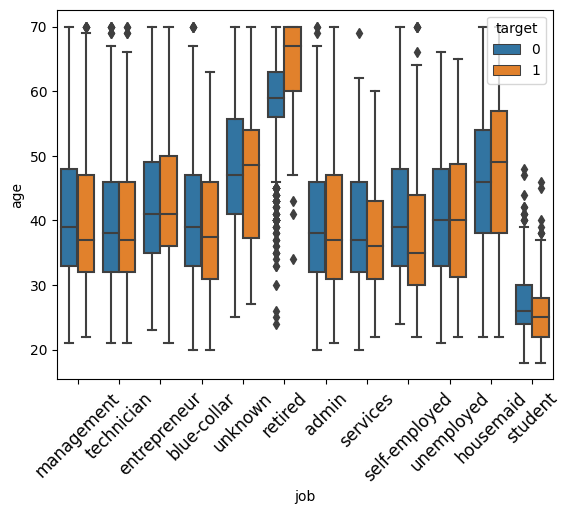

In [ ]:
sns.boxplot(x = "job", y = 'age', hue = 'target', data = df)
plt.xticks(fontsize=12)
plt.xticks(rotation=45)

<Axes: xlabel='marital', ylabel='age'>

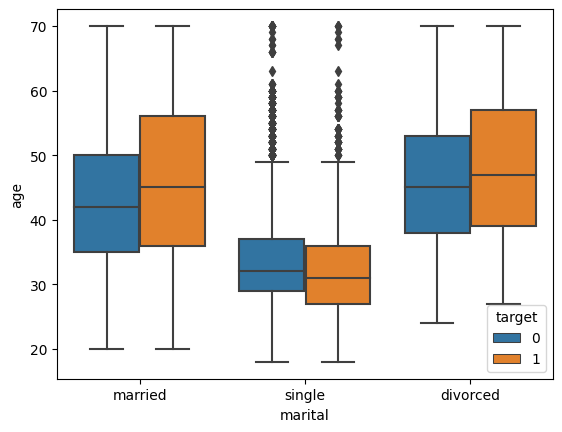

In [ ]:
sns.boxplot(x = "marital", y = 'age', hue = 'target', data = df)

In [ ]:
## Observations - Married and Divorced people are taking more Insurances, when comared with single.

<Axes: xlabel='education_qual', ylabel='age'>

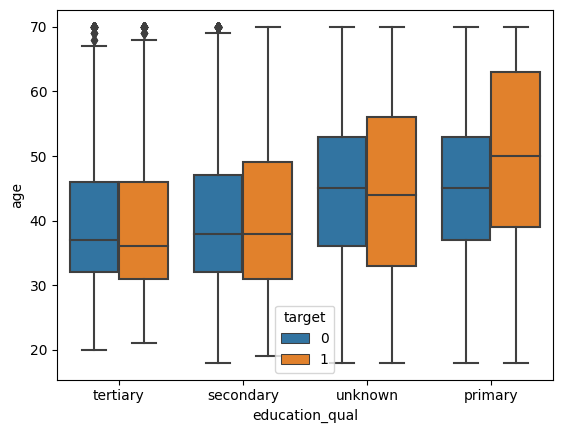

In [ ]:
sns.boxplot(x = "education_qual", y = 'age', hue = 'target', data = df)

<Axes: xlabel='call_type', ylabel='age'>

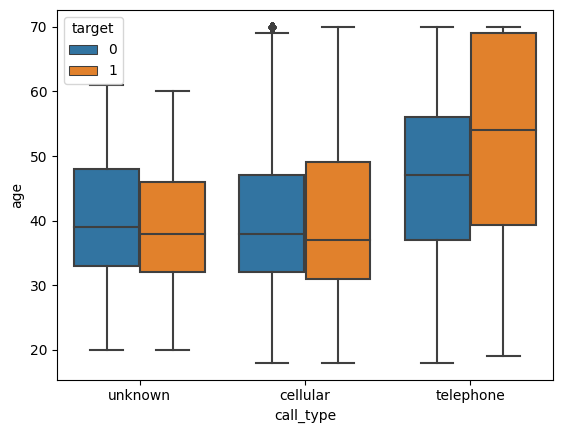

In [ ]:
sns.boxplot(x = "call_type", y = 'age', hue = 'target', data = df)

In [ ]:
#Observation - Most of the people prefers Telephone

<Axes: xlabel='day', ylabel='age'>

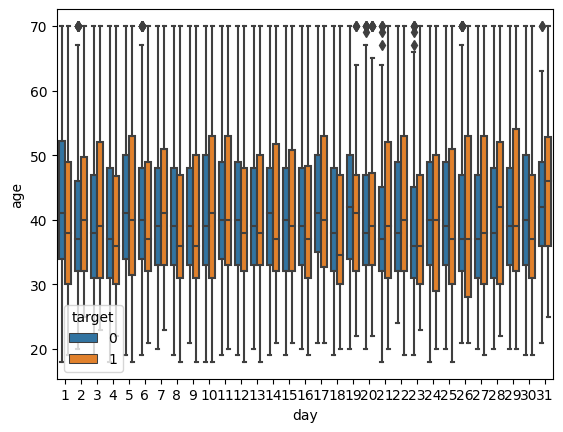

In [ ]:
#matplotlib.rcParams['figure.figsize'] = (12,6)

sns.boxplot(x = "day", y = 'age', hue = 'target', data = df)

<Axes: xlabel='mon', ylabel='age'>

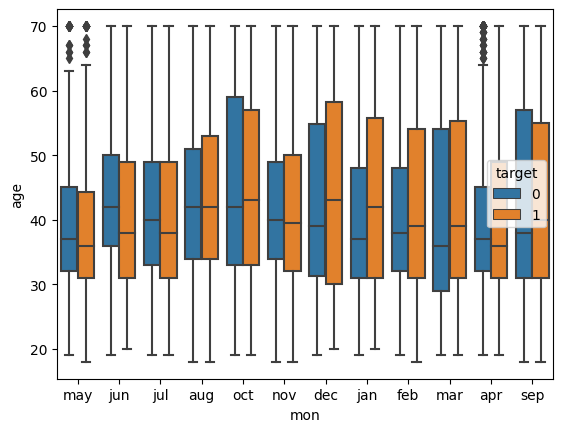

In [ ]:
sns.boxplot(x = "mon", y = 'age', hue = 'target', data = df)

<Axes: xlabel='num_calls', ylabel='age'>

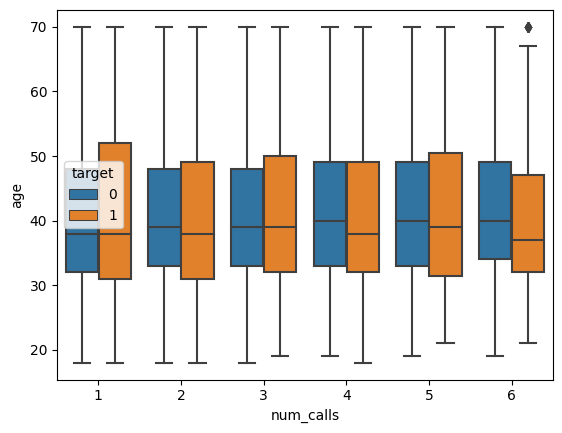

In [ ]:
sns.boxplot(x = "num_calls", y = 'age', hue = 'target', data = df)

<Axes: xlabel='prev_outcome', ylabel='age'>

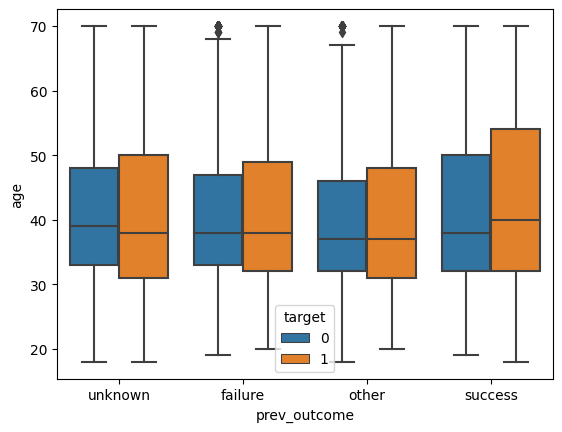

In [ ]:
sns.boxplot(x = "prev_outcome", y = 'age', hue = 'target', data = df)

<Axes: xlabel='marital', ylabel='count'>

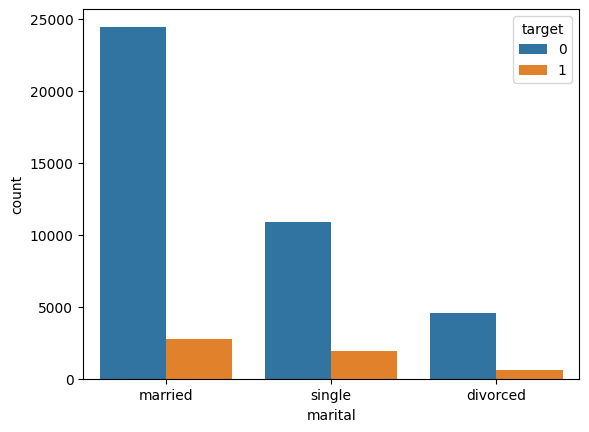

In [ ]:
sns.countplot(x = "marital", hue = 'target', data = df)

<Axes: xlabel='target', ylabel='age'>

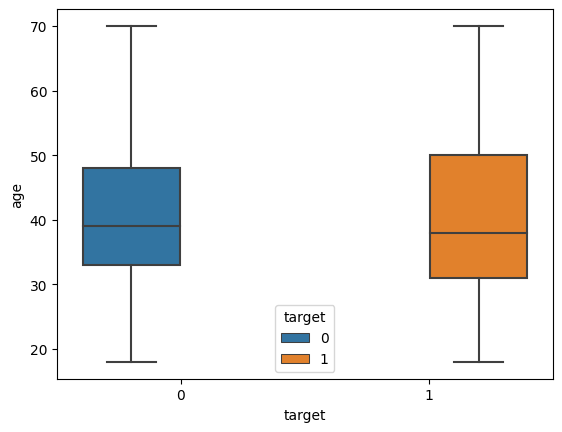

In [ ]:
## age - Conti  y - Cat => bar / box plot

sns.boxplot(x = "target", y = 'age', hue='target', data = df)

<Axes: xlabel='job'>

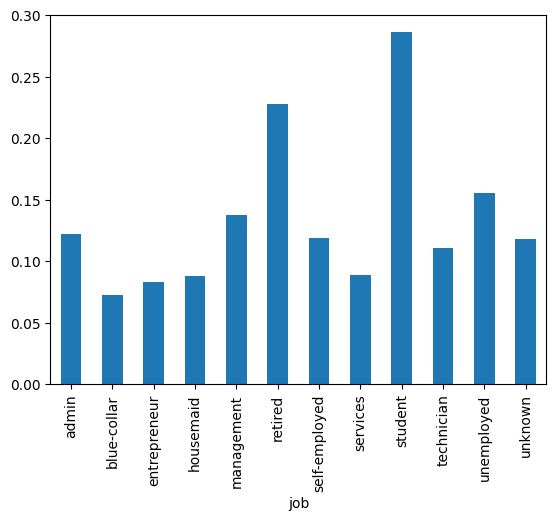

In [ ]:
## job - Cat  y - Cat => Bar/ Stacked Bar Chart

df.groupby('job')['target'].mean().plot(kind = 'bar')

Observation - Chances of taking Insurance is changing with the Job




<Axes: xlabel='marital'>

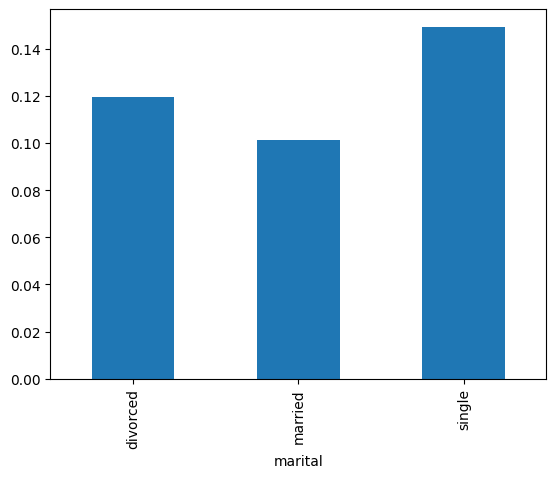

In [ ]:
## marital - Cat  y - Cat => bar / Stacked Bar

df.groupby('marital')['target'].mean().plot(kind = 'bar')

Observation - Chances of taking Insurance is changing with the Mariage status.

<Axes: xlabel='education_qual'>

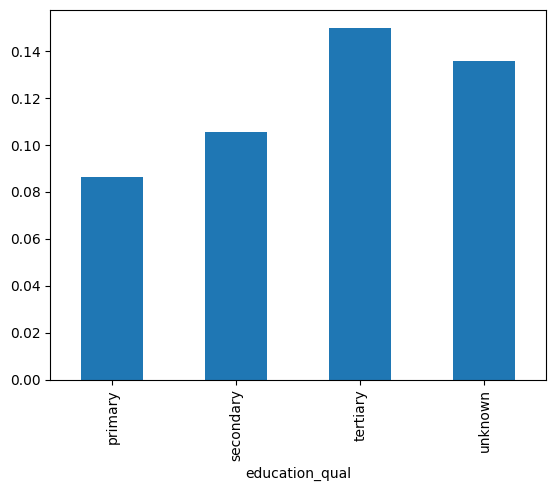

In [ ]:
## education_qual - Cat  y - Cat => bar / Stacked Bar

df.groupby('education_qual')['target'].mean().plot(kind = 'bar')

<Axes: xlabel='call_type'>

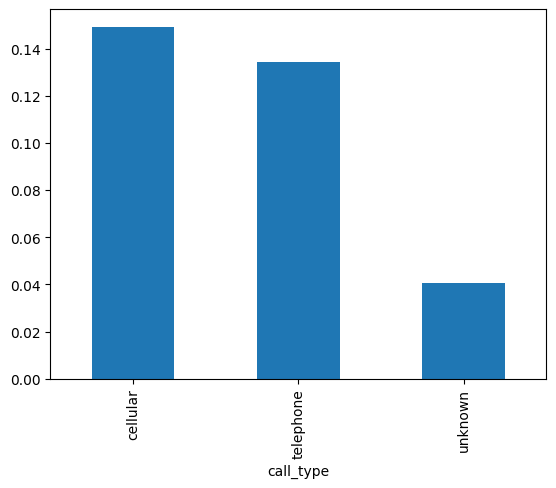

In [ ]:
## call_type - Cat  y - Cat => bar / Stacked Bar

df.groupby('call_type')['target'].mean().plot(kind = 'bar')

<Axes: xlabel='day'>

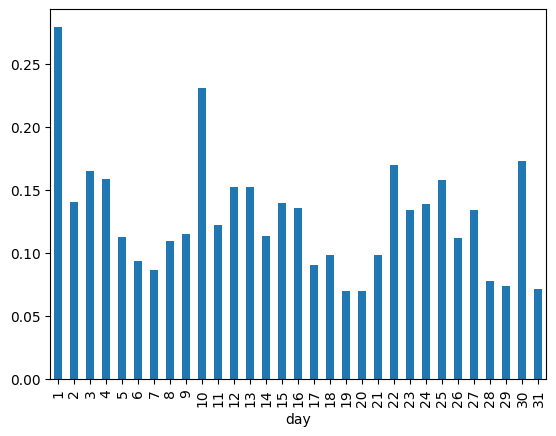

In [ ]:
## day - Conti  y - Cat => bar / box plot
df.groupby('day')['target'].mean().plot(kind = 'bar')

<Axes: xlabel='mon'>

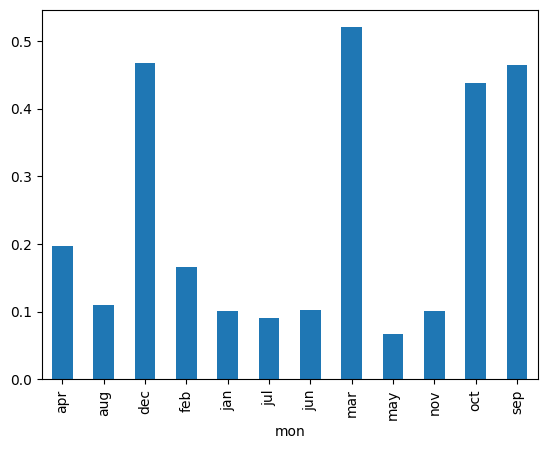

In [ ]:
## mon - Cat  y - Cat => bar / Stacked Bar

df.groupby('mon')['target'].mean().plot(kind='bar')

<Axes: xlabel='target'>

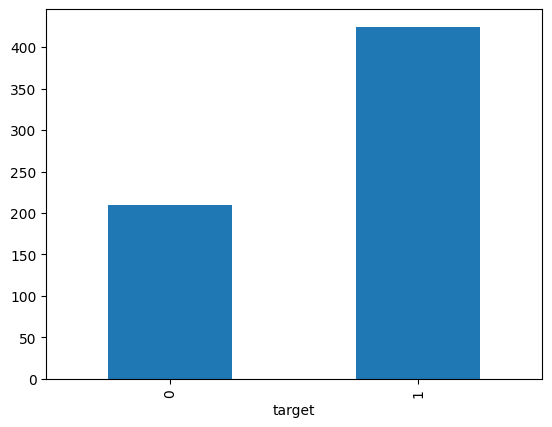

In [ ]:
## dur - Conti  y - Cat => bar / box plot
df.groupby('target')['dur'].mean().plot(kind='bar')

<Axes: xlabel='num_calls'>

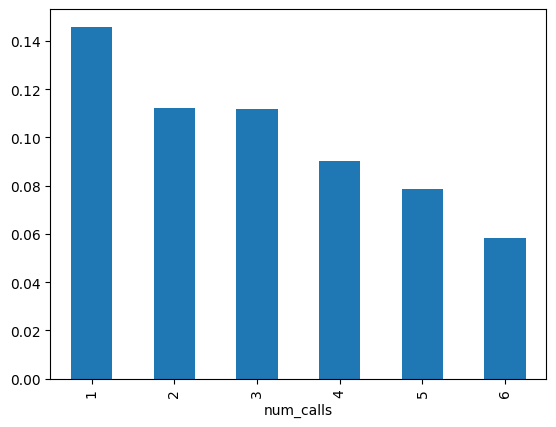

In [ ]:
## num_calls - Conti  y - Cat => bar / box plot
df.groupby('num_calls')['target'].mean().plot(kind='bar')

<Axes: xlabel='prev_outcome'>

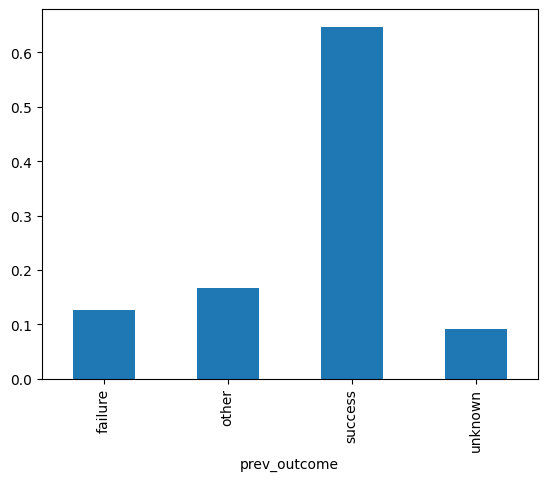

In [ ]:
## prev_outcome - Cat  y - Cat => bar / Stacked Bar

df.groupby('prev_outcome')['target'].mean().plot(kind='bar')

# Encode

In [ ]:
del df['y']

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education_qual', 'call_type', 'day', 'mon',
       'dur', 'num_calls', 'prev_outcome', 'target'],
      dtype='object')

In [ ]:
df.dtypes

age                int64
job               object
marital           object
education_qual    object
call_type         object
day                int64
mon               object
dur                int64
num_calls          int64
prev_outcome      object
target             int64
dtype: object

In [ ]:
df.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [ ]:
df1 = pd.get_dummies(df['job'],prefix='job')
df1.head()

,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.job_admin.dtype

dtype('uint8')

In [ ]:
df_final = pd.concat([df,df1],axis=1)

In [ ]:
df_final.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final['job_admin'] = df_final["job_admin"].astype(int)

In [ ]:
df_final['job_admin'].dtype

dtype('int64')

In [ ]:
df_final['job_blue-collar'] = df_final["job_blue-collar"].astype(int)
df_final['job_entrepreneur'] = df_final["job_entrepreneur"].astype(int)
df_final['job_housemaid'] = df_final["job_housemaid"].astype(int)
df_final['job_management'] = df_final["job_management"].astype(int)
df_final['job_retired'] = df_final["job_retired"].astype(int)
df_final['job_self-employed'] = df_final["job_self-employed"].astype(int)
df_final['job_services'] = df_final["job_services"].astype(int)
df_final['job_student'] = df_final["job_student"].astype(int)
df_final['job_technician'] = df_final["job_technician"].astype(int)
df_final['job_unemployed'] = df_final["job_unemployed"].astype(int)
df_final['job_unknown'] = df_final["job_unknown"].astype(int)

In [ ]:
del df_final['job']

In [ ]:
df_final.dtypes

age                   int64
marital              object
education_qual       object
call_type            object
day                   int64
mon                  object
dur                   int64
num_calls             int64
prev_outcome         object
target                int64
job_admin             int64
job_blue-collar       int64
job_entrepreneur      int64
job_housemaid         int64
job_management        int64
job_retired           int64
job_self-employed     int64
job_services          int64
job_student           int64
job_technician        int64
job_unemployed        int64
job_unknown           int64
dtype: object

In [ ]:
df_final.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [ ]:
df_final.marital=df_final.marital.map({'single':0,'married':1,'divorced':2})

In [ ]:
df_final.marital.dtype

dtype('int64')

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,tertiary,unknown,5,may,261,1,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,secondary,unknown,5,may,151,1,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,secondary,unknown,5,may,76,1,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,unknown,unknown,5,may,92,1,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,unknown,unknown,5,may,198,1,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final.education_qual.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [ ]:
df_final.education_qual = df_final.education_qual.map({'unknown':0,'primary':1,'secondary':2,'tertiary':3})

In [ ]:
df_final.education_qual.dtype

dtype('int64')

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,unknown,5,may,261,1,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,2,unknown,5,may,151,1,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,unknown,5,may,76,1,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,0,unknown,5,may,92,1,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,0,unknown,5,may,198,1,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final.call_type.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [ ]:
df_final.call_type = df_final.call_type.map({'unknown':0,'cellular':1,'telephone':2})

In [ ]:
df_final.call_type.dtype

dtype('int64')

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,0,5,may,261,1,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,2,0,5,may,151,1,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,5,may,76,1,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,0,0,5,may,92,1,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,5,may,198,1,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final.mon.isna().sum()

0

In [ ]:
df_final.mon.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [ ]:
df_final.mon = df_final.mon.map({'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12})

In [ ]:
df_final.mon.dtype

dtype('int64')

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,0,5,5,261,1,unknown,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,2,0,5,5,151,1,unknown,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,5,5,76,1,unknown,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,0,0,5,5,92,1,unknown,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,5,5,198,1,unknown,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_final.prev_outcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [ ]:
df_final.prev_outcome = df_final.prev_outcome.map({'failure':0,'success':1,'unknown':2,'other':3})

In [ ]:
df_final.prev_outcome.dtype

dtype('int64')

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,0,5,5,261,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,2,0,5,5,151,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,5,5,76,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,0,0,5,5,92,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,5,5,198,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1


# Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = df_final.target
X = df_final.drop(columns = ['target'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

# Scale

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
df_final.head()

,age,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,target,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,1,3,0,5,5,261,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0
1,44,0,2,0,5,5,151,1,2,0,0,0,0,0,0,0,0,0,0,1,0,0
2,33,1,2,0,5,5,76,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0
3,47,1,0,0,5,5,92,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,5,5,198,1,2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
count,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,36156.000000,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04,3.615600e+04
mean,2.722804e-16,1.243980e-16,-6.563814e-17,-2.201040e-17,-5.954598e-17,7.467813e-17,-8.686245e-17,5.502599e-18,9.904678e-17,-2.225605e-17,8.941723e-18,7.566073e-18,0.000000,-4.480688e-17,-1.532867e-17,-5.581207e-17,-2.358257e-18,-5.699120e-17,-7.074770e-18,-3.969732e-17,-3.635646e-17
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-2.210628e+00,-1.367851e+00,-2.649003e+00,-1.412649e+00,-1.779870e+00,-2.134034e+00,-1.328481e+00,-8.689752e-01,-2.627468e+00,-3.596465e-01,-5.250323e-01,-1.848809e-01,-0.170382,-5.132687e-01,-2.285595e-01,-1.919638e-01,-3.152262e-01,-1.450471e-01,-4.502826e-01,-1.722637e-01,-7.788455e-02
25%,-7.612679e-01,-1.367851e+00,-7.831651e-02,-1.412649e+00,-9.386971e-01,-4.730404e-01,-7.437388e-01,-8.689752e-01,3.065387e-01,-3.596465e-01,-5.250323e-01,-1.848809e-01,-0.170382,-5.132687e-01,-2.285595e-01,-1.919638e-01,-3.152262e-01,-1.450471e-01,-4.502826e-01,-1.722637e-01,-7.788455e-02
50%,-1.815241e-01,2.770096e-01,-7.831651e-02,4.055105e-01,2.264359e-02,-5.779205e-02,-3.122789e-01,-2.457497e-01,3.065387e-01,-3.596465e-01,-5.250323e-01,-1.848809e-01,-0.170382,-5.132687e-01,-2.285595e-01,-1.919638e-01,-3.152262e-01,-1.450471e-01,-4.502826e-01,-1.722637e-01,-7.788455e-02
75%,6.880917e-01,2.770096e-01,1.207027e+00,4.055105e-01,6.234815e-01,7.727046e-01,4.711615e-01,3.774758e-01,3.065387e-01,-3.596465e-01,-5.250323e-01,-1.848809e-01,-0.170382,-5.132687e-01,-2.285595e-01,-1.919638e-01,-3.152262e-01,-1.450471e-01,-4.502826e-01,-1.722637e-01,-7.788455e-02
max,2.813819e+00,1.921870e+00,1.207027e+00,2.223670e+00,1.825157e+00,2.433698e+00,2.321897e+00,2.247152e+00,1.773542e+00,2.780508e+00,1.904645e+00,5.408888e+00,5.869162,1.948297e+00,4.375228e+00,5.209315e+00,3.172325e+00,6.894312e+00,2.220828e+00,5.805054e+00,1.283952e+01


# Imbalance Data
check if the Data is Imbalanced or not

In [ ]:
y_train.value_counts()/y_train.shape[0]

0    0.884915
1    0.115085
Name: target, dtype: float64

In [ ]:
target_count = df_final.target.value_counts()
print("Class 0 = ", round(target_count[0]*100/(target_count[1]+target_count[0]),2),'%')

Class 0 =  88.3 %


In [ ]:
## Observation - More than 75% of data belongs to the one target class, there is inbalance in the Data.
##  1 -> Yes 0 -> No, Most people are not taking Insurances.
## SMOTE + ENN is the best Imbalance technique

In [ ]:
df_final.target.value_counts()

0    39908
1     5287
Name: target, dtype: int64

In [ ]:
count_class_0, count_class_1 = df_final.target.value_counts()
count_class_0, count_class_1

(39908, 5287)

Oversampling - SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
X_sm.shape, y_sm.shape

((63990, 21), (63990,))

Oversampling followed by under sampling

In [ ]:
from imblearn.combine import SMOTEENN

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train)

In [ ]:
y_smt.shape, y_smt.shape

((56108,), (56108,))

# ML Models

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

# ***Logistic Regression on SMOTE + ENN***




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
f'Test data accuracy is : {lr.score(X_test_scaled, y_test)}, {f1_score(y_test, lr.predict(X_test_scaled))} '

'Test data accuracy is : 0.7422281225799314, 0.44364851957975177 '

In [ ]:
confusion_matrix(y_test,lr.predict(X_test_scaled))

array([[5780, 2133],
       [ 197,  929]])

In [ ]:
accuracy_score(y_test,lr.predict(X_test_scaled))

0.7422281225799314

In [ ]:
lr = LogisticRegression(penalty='l1', C=10, solver='liblinear')
lr.fit(X_smt, y_smt)
f'Test data accuracy is : {lr.score(X_test_scaled, y_test)}, {f1_score(y_test, lr.predict(X_test_scaled))} '

'Test data accuracy is : 0.7422281225799314, 0.44364851957975177 '

# ***Logistic Regression on SMOTE***

In [ ]:
lrn = LogisticRegression(max_iter=10000)
lrn.fit(X_sm,y_sm)
f'Test data accuracy is : {lrn.score(X_test_scaled, y_test)}, {f1_score(y_test, lrn.predict(X_test_scaled))} '

'Test data accuracy is : 0.7807279566323708, 0.46112017400761285 '

In [ ]:
confusion_matrix(y_test,lrn.predict(X_test_scaled))

array([[6209, 1704],
       [ 278,  848]])

In [ ]:
accuracy_score(y_test,lrn.predict(X_test_scaled))

0.7807279566323708

In [ ]:
lrn = LogisticRegression(penalty='l1', C=25, solver='liblinear')
lrn.fit(X_sm, y_sm)
f'Test data accuracy is : {lrn.score(X_test_scaled, y_test)}, {f1_score(y_test, lrn.predict(X_test_scaled))} '

'Test data accuracy is : 0.7806173249253237, 0.4609948355531394 '

***Logistic Regression Observations***   
**SMOTE+ENN** - Confusion Matrix - array([[5769, 2144],
       [ 193,  933]])                              
                F1 Score - 44%      
                accuracy Score - 74%      
**SMOTE**     - Confusion Matrix - array([[6219,  1694],
       [ 273,  853]])       
                F1 Score - 46%         
                accuracy Score - 78%     


1.   For Logistic Regression, SMOTE is giving Better Values when compared with SMOTE+ENN.
2.   [TN FP],[FN TP]



# ***KNN using SMOTE + ENN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn = KNeighborsClassifier(i) #initialising the model
  knn.fit(X_smt, y_smt) # training the model
  print("K value  : " , i, " train score : ", knn.score(X_smt, y_smt) ,
        " cv score : ", np.mean(cross_val_score(knn, X_smt , y_smt, cv=10)))

K value  :  1  train score :  1.0  cv score :  0.9972584750572515
K value  :  2  train score :  0.9998041763836719  cv score :  0.9970626631646935
K value  :  3  train score :  0.99818418101223  cv score :  0.9913303540661571
K value  :  4  train score :  0.9980773681305966  cv score :  0.9911345706940476
K value  :  5  train score :  0.9940362807754615  cv score :  0.9827497331278255
K value  :  6  train score :  0.9940006764815836  cv score :  0.9825717623602712
K value  :  7  train score :  0.9876453100243889  cv score :  0.9742047342296656
K value  :  8  train score :  0.9875028928488776  cv score :  0.9749346548990874
K value  :  9  train score :  0.9803642319263703  cv score :  0.9674043691932763
K value  :  10  train score :  0.981111922097805  cv score :  0.9676535808722353
K value  :  20  train score :  0.9548181510690189  cv score :  0.9437987767009229
K value  :  50  train score :  0.9176650704074911  cv score :  0.9100459255275318


In [ ]:
knn = KNeighborsClassifier(2)
knn.fit(X_smt, y_smt)

f'Test data accuracy is : {knn.score(X_test_scaled,y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.8334992808939042, 0.5037916254533465 '

In [ ]:
knn = KNeighborsClassifier(2, metric="manhattan")
knn.fit(X_smt, y_smt)

f'Test data accuracy is : {knn.score(X_test_scaled,y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.8506471954862264, 0.5140388768898488 '

In [ ]:
knn = KNeighborsClassifier(2, metric="minkowski", p=3)
knn.fit(X_smt, y_smt)

f'Test data accuracy is : {knn.score(X_test_scaled,y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.8273039052992588, 0.49823207971713274 '

# ***KNN with SMOTE***

In [ ]:
for i in [1,2,3,4,5,6,7,8,9,10,20,50]:
  knn1 = KNeighborsClassifier(i) #initialising the model
  knn1.fit(X_sm, y_sm) # training the model
  print("K value  : " , i, " train score : ", knn1.score(X_sm, y_sm) ,
        " cv score : ", np.mean(cross_val_score(knn1, X_sm , y_sm, cv=10)))

K value  :  1  train score :  0.9999218627910611  cv score :  0.9476168151273636
K value  :  2  train score :  0.9946397874667917  cv score :  0.945116424441319
K value  :  3  train score :  0.9603219253008283  cv score :  0.9300046882325363
K value  :  4  train score :  0.9631192373808407  cv score :  0.9324738240350054
K value  :  5  train score :  0.9410845444600718  cv score :  0.9166432255039851
K value  :  6  train score :  0.9448976402562901  cv score :  0.9194405375839976
K value  :  7  train score :  0.9281293952180029  cv score :  0.9068917018284106
K value  :  8  train score :  0.9316143147366776  cv score :  0.9090170339115489
K value  :  9  train score :  0.9179871854977341  cv score :  0.8993123925613377
K value  :  10  train score :  0.9214252226910454  cv score :  0.9021878418502892
K value  :  20  train score :  0.8944835130489139  cv score :  0.8804813252070636
K value  :  50  train score :  0.8561025160181278  cv score :  0.8462884825754025


In [ ]:
knn1 = KNeighborsClassifier(6)
knn1.fit(X_sm, y_sm)

f'Test data accuracy is : {knn1.score(X_test_scaled,y_test)}, {f1_score(y_test, knn1.predict(X_test_scaled))} '

'Test data accuracy is : 0.8299590662683926, 0.49820437479595164 '

In [ ]:
knn1 = KNeighborsClassifier(6, metric="manhattan")
knn1.fit(X_sm, y_sm)

f'Test data accuracy is : {knn1.score(X_test_scaled,y_test)}, {f1_score(y_test, knn1.predict(X_test_scaled))} '

'Test data accuracy is : 0.8539661466976436, 0.521044992743106 '

In [ ]:
knn1 = KNeighborsClassifier(6, metric="minkowski", p=3)
knn1.fit(X_sm, y_sm)

f'Test data accuracy is : {knn1.score(X_test_scaled,y_test)}, {f1_score(y_test, knn1.predict(X_test_scaled))} '

'Test data accuracy is : 0.8239849540878416, 0.4937957365574292 '

***Observation for KNN using SMOTE+ENN** &  **SMOTE** -     

1.   **K = 1**, has the best cv_scores but, 1 can lead
to overfitting, as the model may become too sensitive to noise in the training data.
2.   So Tried with Both K=2 & K=3, K=2 gives the best score. ** K = 2**, is the best value which is 83%
3.   Both SMOTE and SMOTE+ENN gives the same score, we can use any one of it.



# **DECISION TREE (SMOTE+ENN)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,5,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,35,40]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(X_smt, y_smt)

  print("Depth  : " , depth, " train score : ", dt.score(X_smt, y_smt) ,
        " and cross-val score : ", np.mean(cross_val_score(dt, X_smt , y_smt, cv=10)))

Depth  :  1  train score :  0.766809677247076  and cross-val score :  0.7662579232182625
Depth  :  5  train score :  0.8755451907500045  and cross-val score :  0.8735874820075582
Depth  :  10  train score :  0.9444929058444448  and cross-val score :  0.9322811611726671
Depth  :  15  train score :  0.9831057625549642  and cross-val score :  0.9555133639533093
Depth  :  16  train score :  0.9874494864080609  and cross-val score :  0.9570266240921862
Depth  :  17  train score :  0.9908496964733947  and cross-val score :  0.9568842278307226
Depth  :  18  train score :  0.9943923237142399  and cross-val score :  0.957720903707804
Depth  :  19  train score :  0.996386164171399  and cross-val score :  0.9572936832340263
Depth  :  20  train score :  0.9977213251918181  and cross-val score :  0.9584685514204356
Depth  :  21  train score :  0.9984690153632528  and cross-val score :  0.9582906313559008
Depth  :  22  train score :  0.9990030797714204  and cross-val score :  0.9572581721067099
Dept

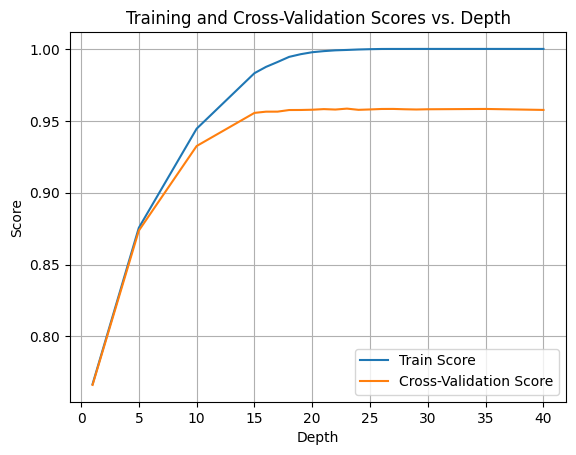

In [ ]:
import matplotlib.pyplot as plt

depth_values = [1,5,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,35,40]  # Add more depths if needed

# Initialize empty lists to store the scores
train_scores = []
cv_scores = []

# Loop through each depth value and calculate the scores
for depth in depth_values:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_smt, y_smt)
    train_scores.append(dt.score(X_smt, y_smt))
    cv_scores.append(np.mean(cross_val_score(dt, X_smt, y_smt, cv=10)))

# Plot the scores against the depth
plt.plot(depth_values, train_scores, label='Train Score')
plt.plot(depth_values, cv_scores, label='Cross-Validation Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Scores vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

**Observation** - From the above Graph it's safe to say the curve starts at 24/20.

In [ ]:
dt = DecisionTreeClassifier(max_depth = 21)
dt.fit(X_smt, y_smt)
f'Test data accuracy is : {dt.score(X_test_scaled, y_test)}, {f1_score(y_test, dt.predict(X_test_scaled))} '

'Test data accuracy is : 0.8497621418298484, 0.5488372093023256 '

# Decision Tree with SMOTE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,5,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,35,40]:
  dt1 = DecisionTreeClassifier(max_depth = depth)
  dt1.fit(X_sm, y_sm)

  print("Depth  : " , depth, " train score : ", dt1.score(X_sm, y_sm) ,
        " and cross-val score : ", np.mean(cross_val_score(dt1, X_sm , y_sm, cv=10)))

Depth  :  1  train score :  0.7209563994374121  and cross-val score :  0.720753242694171
Depth  :  5  train score :  0.8260509454602282  and cross-val score :  0.8255821222065947
Depth  :  10  train score :  0.8967963744335052  and cross-val score :  0.881512736365057
Depth  :  15  train score :  0.9564932020628223  and cross-val score :  0.9111111111111111
Depth  :  16  train score :  0.9643225503984998  and cross-val score :  0.9125332083137989
Depth  :  17  train score :  0.9707298015314892  and cross-val score :  0.9130645413345835
Depth  :  18  train score :  0.977262072198781  and cross-val score :  0.9148929520237538
Depth  :  19  train score :  0.9825910298484138  and cross-val score :  0.9159399906235348
Depth  :  20  train score :  0.9867791842475386  and cross-val score :  0.9148148148148149
Depth  :  21  train score :  0.9904516330676668  and cross-val score :  0.9165963431786217
Depth  :  22  train score :  0.9931239256133771  and cross-val score :  0.9163931864353805
Dept

In [ ]:
import matplotlib.pyplot as plt

depth_values = [1,5,10,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,35,40]  # Add more depths if needed

# Initialize empty lists to store the scores
train_scores1 = []
cv_scores1 = []

# Loop through each depth value and calculate the scores
for depth in depth_values:
    dt1 = DecisionTreeClassifier(max_depth=depth)
    dt1.fit(X_sm, y_sm)
    train_scores1.append(dt1.score(X_sm, y_sm))
    cv_scores1.append(np.mean(cross_val_score(dt1, X_sm, y_sm, cv=10)))

# Plot the scores against the depth
plt.plot(depth_values, train_scores1, label='Train Score')
plt.plot(depth_values, cv_scores1, label='Cross-Validation Score')
plt.xlabel('Depth')
plt.ylabel('Score')
plt.title('Training and Cross-Validation Scores vs. Depth')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
dt1 = DecisionTreeClassifier(max_depth = 19)
dt1.fit(X_sm, y_sm)
f'Test data accuracy is : {dt1.score(X_test_scaled, y_test)}, {f1_score(y_test, dt1.predict(X_test_scaled))} '

# Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)],voting ='hard')
model.fit(X_smt, y_smt)
f'Test data accuracy is : {model.score(X_test_scaled, y_test)}, {f1_score(y_test, model.predict(X_test_scaled))} '

'Test data accuracy is : 0.8364863369841796, 0.5387016229712859 '

In [ ]:
from sklearn.ensemble import VotingClassifier

model1 = VotingClassifier(estimators = [('logistic_regression', lrn),('k-nn', knn1),('decision-tree', dt1)],voting ='hard')
model1.fit(X_sm, y_sm)
f'Test data accuracy is : {model1.score(X_test_scaled, y_test)}, {f1_score(y_test, model1.predict(X_test_scaled))} '

'Test data accuracy is : 0.8515322491426043, 0.5457007447528776 '

# Randam Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,5,10,15,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(X_smt, y_smt)
  train_score = rf.score(X_smt, y_smt)
  cross_val_result = np.mean(cross_val_score(rf, X_smt, y_smt, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

In [ ]:
rf = RandomForestClassifier(max_depth = 26)
rf.fit(X_smt, y_smt)
f'Test data accuracy is : {rf.score(X_test_scaled, y_test)}, {f1_score(y_test, rf.predict(X_test_scaled))} '

'Test data accuracy is : 0.8609359442416197, 0.5928085519922255 '

In [ ]:
list(zip(X.columns, rf.feature_importances_))

NameError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,5,10,15,20,21,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,45,50]:
  rfc = RandomForestClassifier(max_depth = depth)
  rfc.fit(X_sm, y_sm)
  train_score = rfc.score(X_sm, y_sm)
  cross_val_result = np.mean(cross_val_score(rfc, X_sm, y_sm, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.7563681825285201 and cross-val score : 0.7585091420534458
Depth : 5, training score : 0.8488045007032349 and cross-val score : 0.8491483044225661
Depth : 10, training score : 0.9070948585716518 and cross-val score : 0.8996874511642444
Depth : 15, training score : 0.9592280043756837 and cross-val score : 0.9294889826535396
Depth : 20, training score : 0.9888420065635255 and cross-val score : 0.9440381309579621
Depth : 21, training score : 0.9915924363181747 and cross-val score : 0.9459446788560711
Depth : 25, training score : 0.9980465697765276 and cross-val score : 0.9482731676824503
Depth : 26, training score : 0.9988123144241288 and cross-val score : 0.9483356774496017
Depth : 27, training score : 0.9995468041881544 and cross-val score : 0.9497265197687138
Depth : 28, training score : 0.9997343334896077 and cross-val score : 0.9492733239568683
Depth : 29, training score : 0.9997968432567589 and cross-val score : 0.9502578527894983
Depth : 30, training sc

In [ ]:
rfc = RandomForestClassifier(max_depth = 27)
rfc.fit(X_sm, y_sm)
f'Test data accuracy is : {rfc.score(X_test_scaled, y_test)}, {f1_score(y_test, rfc.predict(X_test_scaled))} '

'Test data accuracy is : 0.8921340856289413, 0.5795601552393272 '

max_depth 29 - 56.1%   
          28 - 56.6%   
          27 - 57%   
          30 - 56.7%  

In [ ]:
list(zip(X.columns, rfc.feature_importances_))

NameError: ignored

# XG Boost

In [ ]:
import xgboost as xgb

for lr in [0.001, 0.01,0.05,0.07,0.09, 0.1,0.2,0.3,0.4, 0.5,0.6,0.7,0.8,0.9, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(X_smt, y_smt)
  train_score = xg.score(X_smt, y_smt)
  cross_val_result = np.mean(cross_val_score(xg, X_smt, y_smt, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.9001924859200114 and cross-val score : 0.8967705560537919
Learning Rate : 0.01, training score : 0.9181756612247808 and cross-val score : 0.9162331249636649
Learning Rate : 0.05, training score : 0.964693091894204 and cross-val score : 0.9597564117593054
Learning Rate : 0.07, training score : 0.9687566835388893 and cross-val score : 0.9634101654790008
Learning Rate : 0.09, training score : 0.9726776930206031 and cross-val score : 0.9652281026796421
Learning Rate : 0.1, training score : 0.9733371355243459 and cross-val score : 0.9662083804698627
Learning Rate : 0.2, training score : 0.9828010265915734 and cross-val score : 0.9688998183158812
Learning Rate : 0.3, training score : 0.986793327154773 and cross-val score : 0.9668325268896625
Learning Rate : 0.4, training score : 0.990643045555001 and cross-val score : 0.9658879410223932
Learning Rate : 0.5, training score : 0.992603550295858 and cross-val score : 0.9663513324190356
Learning Rate : 0.

In [ ]:
xg = xgb.XGBClassifier(learning_rate=0.5)
xg.fit(X_smt, y_smt)
f'Test data accuracy is : {xg.score(X_test_scaled, y_test)}, {f1_score(y_test, xg.predict(X_test_scaled))} '

'Test data accuracy is : 0.8797433344396504, 0.6197971318642882 '

In [ ]:
list(zip(X.columns, xg.feature_importances_))

[('age', 0.015188084),
 ('marital', 0.012785219),
 ('education_qual', 0.026086768),
 ('call_type', 0.29887244),
 ('day', 0.022405643),
 ('mon', 0.07467757),
 ('dur', 0.14041048),
 ('num_calls', 0.06720887),
 ('prev_outcome', 0.13733716),
 ('job_admin', 0.010621282),
 ('job_blue-collar', 0.046574466),
 ('job_entrepreneur', 0.013731369),
 ('job_housemaid', 0.009134058),
 ('job_management', 0.008065553),
 ('job_retired', 0.008724141),
 ('job_self-employed', 0.020384042),
 ('job_services', 0.010208677),
 ('job_student', 0.061704814),
 ('job_technician', 0.009201587),
 ('job_unemployed', 0.0046232),
 ('job_unknown', 0.0020544447)]

In [ ]:
import xgboost as xgb

for lr1 in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xgt = xgb.XGBClassifier(learning_rate=lr1)
  xgt.fit(X_sm, y_sm)
  train_score = xgt.score(X_sm, y_sm)
  cross_val_result = np.mean(cross_val_score(xgt, X_sm, y_sm, cv = 10))
  print(f'Learning Rate : {lr1}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.8440537583997499 and cross-val score : 0.8419127988748242
Learning Rate : 0.002, training score : 0.8447569932802 and cross-val score : 0.8429442100328176
Learning Rate : 0.005, training score : 0.8503672448820128 and cross-val score : 0.8481168932645726
Learning Rate : 0.01, training score : 0.8634005313330207 and cross-val score : 0.8603844350679795
Learning Rate : 0.02, training score : 0.8894202219096734 and cross-val score : 0.8854664791373652
Learning Rate : 0.03, training score : 0.9091264260040631 and cross-val score : 0.9035630567276136
Learning Rate : 0.04, training score : 0.9185497734020941 and cross-val score : 0.9131114236599469
Learning Rate : 0.05, training score : 0.925066416627598 and cross-val score : 0.9177996561962807
Learning Rate : 0.06, training score : 0.9299421784653852 and cross-val score : 0.9208782622284731
Learning Rate : 0.07, training score : 0.9336615096108767 and cross-val score : 0.9234724175652447
Learning Ra

In [ ]:
xgt = xgb.XGBClassifier(learning_rate=0.06)
xgt.fit(X_sm, y_sm)
f'Test data accuracy is : {xgt.score(X_test_scaled, y_test)}, {f1_score(y_test, xgt.predict(X_test_scaled))} '

'Test data accuracy is : 0.878637017369178, 0.6046846846846846 '

In [ ]:
list(zip(X.columns, xgt.feature_importances_))

[('age', 0.022918634),
 ('marital', 0.02004045),
 ('education_qual', 0.053659227),
 ('call_type', 0.22938493),
 ('day', 0.028763276),
 ('mon', 0.073969565),
 ('dur', 0.22293425),
 ('num_calls', 0.11256581),
 ('prev_outcome', 0.082453966),
 ('job_admin', 0.0072470047),
 ('job_blue-collar', 0.060809385),
 ('job_entrepreneur', 0.0076754317),
 ('job_housemaid', 0.0043820357),
 ('job_management', 0.008121005),
 ('job_retired', 0.009698597),
 ('job_self-employed', 0.004074397),
 ('job_services', 0.0056681433),
 ('job_student', 0.028590498),
 ('job_technician', 0.005547826),
 ('job_unemployed', 0.006216432),
 ('job_unknown', 0.005279246)]